### Downloading the CIFAR10 data

In [ ]:
pip install Pillow 

In [11]:
import numpy as np
import pickle
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import csv

# Path to the unzipped CIFAR data
data_dir = Path("data/cifar-10-batches-py/")

# Unpickle function provided by the CIFAR hosts
def unpickle(file):
    with open(file, "rb") as fo:
        dict = pickle.load(fo, encoding="bytes")
    return dict

images, labels = [], []
for batch in data_dir.glob("data_batch_*"):
    batch_data = unpickle(batch)
    for i, flat_im in enumerate(batch_data[b"data"]):
        im_channels = []
        # Each image is flattened, with channels in order of R, G, B
        for j in range(3):
            im_channels.append(
                flat_im[j * 1024 : (j + 1) * 1024].reshape((32, 32))
            )
        # Reconstruct the original image
        images.append(np.dstack((im_channels)))
        # Save the label
        labels.append(batch_data[b"labels"][i])

print("Loaded CIFAR-10 training set:")
print(f" - np.shape(images)     {np.shape(images)}")
print(f" - np.shape(labels)     {np.shape(labels)}")

Loaded CIFAR-10 training set:
 - np.shape(images)     (50000, 32, 32, 3)
 - np.shape(labels)     (50000,)


In [12]:
disk_dir = Path("data/disk/")
disk_dir.mkdir(parents=True, exist_ok=True)

### Storing a single image to disk

In [ ]:
def store_single_disk(image, image_id, label):
    Image.fromarray(image).save(disk_dir / f"{image_id}.png")

    with open(disk_dir / f"{image_id}.csv", "wt") as csvfile:
        writer = csv.writer(csvfile, delimiter=" ", quotechar="|", quoting=csv.QUOTE_MINIMAL)
        writer.writerow([label])
        

image = images[0]; label = labels[0]
store_single_disk(image, 0, label)

### Storing many images to disk

In [13]:
from pathlib import Path
from PIL import Image
import csv

disk_dir = Path("data/disk/")
disk_dir.mkdir(parents=True, exist_ok=True)

def store_many_disk(images, labels):

    ## Saving the number of images
    num_images = len(images)

    ## Saving images one by one
    for i, image in enumerate(images):
        Image.fromarray(image).save(disk_dir / f"{i}.png")

    ## Saving all the labels to the csv file
    with open(disk_dir / f"{'image_labels'}.csv", "w") as csvfile:
        writer = csv.writer(csvfile, delimiter=" ", quotechar="|", quoting=csv.QUOTE_MINIMAL)
        
        for label in labels:
            writer.writerow([label])
            
## Experimenting
cutoff = 100
images_ = images[:cutoff]; labels_ = labels[:cutoff]
store_many_disk(images_, labels_)

### Reading a single image from disk

In [ ]:
def read_single_disk(image_id):
    
    image = np.array(Image.open(disk_dir / f"{image_id}.png"), dtype = 'int')

    with open(disk_dir / f"{image_id}.csv", "r") as csvfile:
        reader = csv.reader(csvfile, delimiter=" ", quotechar="|", quoting=csv.QUOTE_MINIMAL)
        label = int(next(reader)[0])
    return image, label
    
image = images[0]; label = labels[0]
img = read_single_disk(0)

In [ ]:
plt.imshow(img[0])

### Reading many images from disk

In [14]:
def read_many_disk(num_images):
    images, labels = [], []

    for image_id in range(num_images):
        images.append(np.array(Image.open(disk_dir / f"{image_id}.png")))

    with open(disk_dir / f"{'image_labels'}.csv", "r") as csvfile:
        reader = csv.reader(csvfile, delimiter=" ", quotechar="|", quoting=csv.QUOTE_MINIMAL)
        for row in reader:
            labels.append(int(row[0]))
    return images, labels
        
num_images = cutoff
imgs = read_many_disk(cutoff)

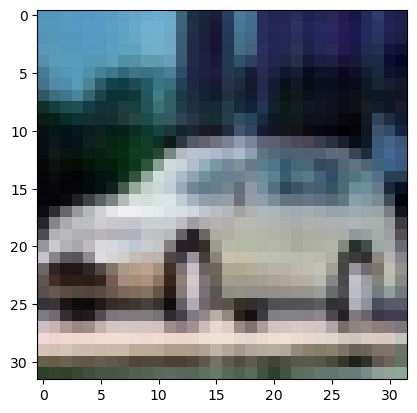

In [21]:
plt.imshow(imgs[0][60])